In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from nltk.tokenize import RegexpTokenizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\GR_Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
stopwords = set(stopwords.words('english'))
regexp = RegexpTokenizer('\w+')

In [3]:
df = pd.read_csv("Language Detection.csv")

In [4]:
df.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10337 non-null  object
 1   Language  10337 non-null  object
dtypes: object(2)
memory usage: 161.6+ KB


In [6]:
df.isnull().sum()

Text        0
Language    0
dtype: int64

In [7]:
df.shape

(10337, 2)

In [8]:
df['Language'].unique()

array(['English', 'Malayalam', 'Hindi', 'Tamil', 'Portugeese', 'French',
       'Dutch', 'Spanish', 'Greek', 'Russian', 'Danish', 'Italian',
       'Turkish', 'Sweedish', 'Arabic', 'German', 'Kannada'], dtype=object)

In [9]:
df['Language'].nunique()

17

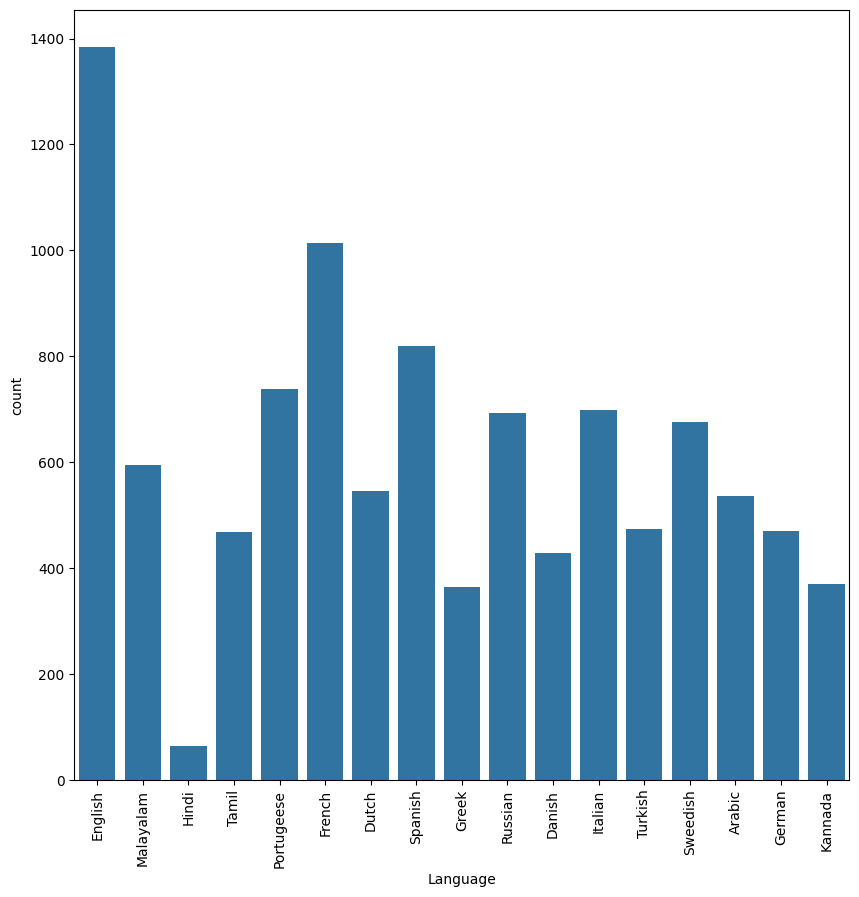

In [10]:
plt.figure(figsize = (10,10))
sns.countplot(data = df , x = 'Language')
plt.xticks(rotation = 90);

In [11]:
df['Language'].value_counts()

Language
English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: count, dtype: int64

This dataset is imbalance

this dataset is bias towards English language

to convert from imbalance to balance dataset,

we will be using downsampling Technique

downsampling is nothing but let's take an example

in our dataset we have 3 language

English
Spanish
Dutch
English has 1000 values

Spanish has 800 values

Dutch has 700 values

So in the english, instead of taking 1000 values we will be taking 700 values

same goes to spanish, instead of taking 800 values we will be taking 700 values

In [12]:
Greek = df[df['Language'] == 'Greek']

In [13]:
English = df[df['Language']=='English']
Portugeese = df[df['Language']=='Portugeese']
French = df[df['Language']=='French']
Dutch = df[df['Language']=='Dutch']
Spanish = df[df['Language']=='Spanish']
Russian = df[df['Language']=='Russian']
Danish = df[df['Language']=='Danish']
Italian = df[df['Language']=='Italian']
Turkish = df[df['Language']=='Turkish']
Sweedish = df[df['Language']=='Sweedish']
German = df[df['Language']=='German']

In [14]:
from sklearn.utils import resample

In [16]:
english_downsample = resample(English,
                              replace = True,
                              n_samples = len(Greek),
                              random_state = 42)
Portugeese_downsample = resample(Portugeese,
                              replace = True,
                              n_samples = len(Greek),
                              random_state = 42)
French_downsample = resample(French,
                              replace = True,
                              n_samples = len(Greek),
                              random_state = 42)
Dutch_downsample = resample(Dutch,
                              replace = True,
                              n_samples = len(Greek),
                              random_state = 42)
Spanish_downsample = resample(Spanish,
                              replace = True,
                              n_samples = len(Greek),
                              random_state = 42)
Russian_downsample = resample(Russian,
                              replace = True,
                              n_samples = len(Greek),
                              random_state = 42)
Danish_downsample = resample(Danish,
                              replace = True,
                              n_samples = len(Greek),
                              random_state = 42)
Italian_downsample = resample(Italian,
                              replace = True,
                              n_samples = len(Greek),
                              random_state = 42)
Turkish_downsample = resample(Turkish,
                              replace = True,
                              n_samples = len(Greek),
                              random_state = 42)
Sweedish_downsample = resample(Sweedish,
                              replace = True,
                              n_samples = len(Greek),
                              random_state = 42)
German_downsample = resample(German,
                              replace = True,
                              n_samples = len(Greek),
                              random_state = 42)

In [17]:
data_downsample = pd.concat([
    english_downsample,
    Portugeese_downsample,
    French_downsample,
    Dutch_downsample,
    Spanish_downsample,
    Russian_downsample,
    Danish_downsample,
    Italian_downsample,
    Turkish_downsample,
    Sweedish_downsample,
    German_downsample,
    Greek
])

In [18]:
data_downsample.head()

,Text,Language
1126,no worries imagine you came home and there are...,English
860,"Due to its generality, the field is studied in...",English
1294,"unfortunately, i have to say no.",English
1130,if you ask somebody not to be upset not to cry...,English
1095,so if you are just about to embark on your jou...,English


In [19]:
data_downsample['Language'].value_counts()

Language
English       365
Portugeese    365
French        365
Dutch         365
Spanish       365
Russian       365
Danish        365
Italian       365
Turkish       365
Sweedish      365
German        365
Greek         365
Name: count, dtype: int64

In [20]:
def clean(text):
  text = text.lower()
  text = re.sub(r"[$!@#%^&*()_+-={}:,<?>.]","",text)
  text = regexp.tokenize(text)
  text = [word for word in text if word not in stopwords]
  text = " ".join(text)
  return text

In [21]:
data_downsample['clean_text'] = data_downsample['Text'].apply(clean)

In [22]:
data_downsample.head()

,Text,Language,clean_text
1126,no worries imagine you came home and there are...,English,worries imagine came home friends sitting couch
860,"Due to its generality, the field is studied in...",English,due generality field studied many disciplines ...
1294,"unfortunately, i have to say no.",English,unfortunately say
1130,if you ask somebody not to be upset not to cry...,English,ask somebody upset cry say take heart
1095,so if you are just about to embark on your jou...,English,embark journey


In [23]:
x = data_downsample.iloc[:,2]
y = data_downsample.iloc[:,1]

In [24]:
vectorizer1 = CountVectorizer(ngram_range = (1,3) , analyzer = 'char')

In [25]:
x1 = vectorizer1.fit_transform(x)

In [26]:
x_train , x_test , y_train , y_test = train_test_split(x1 , y , test_size = 0.2 , random_state = 42)

In [27]:
model1 = MultinomialNB()
model1.fit(x_train , y_train)
model1.score(x_test , y_test)

0.9771689497716894

In [33]:
user = input("enter the text: ")
text = vectorizer1.transform([user]).toarray()
output = model1.predict(text)
print(output)

['Dutch']


In [29]:
model2 = LogisticRegression()
model2.fit(x_train , y_train)
model2.score(x_test , y_test)

0.9726027397260274

In [32]:
user1 = input("Enter the text: ")
text1 = vectorizer1.transform([user1]).toarray()
model2.predict(text1)

array(['Russian'], dtype=object)

In [34]:
import pickle

# Save the trained model (e.g., model1 or model2)
with open('language_detection_model.pkl', 'wb') as model_file:
    pickle.dump(model1, model_file)  # model1/ model2 

# Save the vectorizer
with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer1, vectorizer_file)

print("Model and vectorizer have been saved as pickle files.")

Model and vectorizer have been saved as pickle files.
